In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#so that we see all images

pd.pandas.set_option("display.max_columns", None)

In [40]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.preprocessing import StandardScaler

In [14]:

from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv("housedata_correlated.csv")
print(df.shape)
print(df.info())
df.head()

(2915, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2429 non-null   float64
 1   LotArea       2915 non-null   int64  
 2   OverallQual   2915 non-null   int64  
 3   YearBuilt     2915 non-null   int64  
 4   YearRemodAdd  2915 non-null   int64  
 5   MasVnrArea    2892 non-null   float64
 6   BsmtFinSF1    2914 non-null   float64
 7   BsmtUnfSF     2914 non-null   float64
 8   TotalBsmtSF   2914 non-null   float64
 9   2ndFlrSF      2915 non-null   int64  
 10  GrLivArea     2915 non-null   int64  
 11  BsmtFullBath  2913 non-null   float64
 12  FullBath      2915 non-null   int64  
 13  HalfBath      2915 non-null   int64  
 14  Fireplaces    2915 non-null   int64  
 15  GarageCars    2914 non-null   float64
 16  WoodDeckSF    2915 non-null   int64  
 17  OpenPorchSF   2915 non-null   int64  
 18  SalePrice     145

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,854,1710,1.0,2,1,0,2.0,0,61,208500.0
1,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,0,1262,0.0,2,0,1,2.0,298,0,181500.0
2,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,866,1786,1.0,2,1,1,2.0,0,42,223500.0
3,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,756,1717,1.0,1,0,1,3.0,0,35,140000.0
4,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1053,2198,1.0,2,1,1,3.0,192,84,250000.0


<AxesSubplot:ylabel='Frequency'>

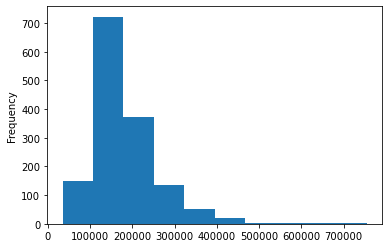

In [6]:
df["SalePrice"].plot(kind = "hist")

In [7]:
df.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
count,2429.000000,2915.000000,2915.000000,2915.000000,2915.000000,2892.000000,2914.000000,2914.000000,2914.000000,2915.000000,2915.000000,2913.000000,2915.000000,2915.000000,2915.000000,2914.000000,2915.000000,2915.000000,1458.000000
mean,69.104570,10145.175986,6.087479,1971.325901,1984.255918,101.961618,439.688401,561.067605,1050.406314,335.888851,1498.887822,0.429454,1.567410,0.380103,0.595883,1.766301,93.748199,47.451801,180893.652949
std,22.289926,7822.450623,1.408949,30.285614,20.888838,178.933284,445.609138,439.750778,430.830789,428.326639,500.289966,0.524061,0.553117,0.502856,0.644908,0.762098,126.567266,67.452767,79479.008386
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,0.000000,1125.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,129925.000000
50%,68.000000,9453.000000,6.000000,1973.000000,1993.000000,0.000000,368.000000,468.000000,990.000000,0.000000,1442.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,27.000000,163000.000000
75%,80.000000,11559.500000,7.000000,2001.000000,2004.000000,164.000000,733.000000,806.000000,1302.000000,704.000000,1743.000000,1.000000,2.000000,1.000000,1.000000,2.000000,168.000000,70.000000,214000.000000
max,200.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,4010.000000,2336.000000,5095.000000,2065.000000,5095.000000,3.000000,4.000000,2.000000,4.000000,5.000000,1424.000000,742.000000,755000.000000


In [16]:
train = df.iloc[:1458]
test = df.iloc[1458:].drop("SalePrice", axis = 1)

X_train = train.drop("SalePrice", axis = 1)
y_train = train["SalePrice"]
X_test = test


In [17]:
print(X_train.shape, len(y_train))
print(X_test.shape)

(1458, 18) 1458
(1457, 18)


In [18]:
df["SalePrice"].isnull().sum()

1457

In [26]:
model = make_pipeline(SimpleImputer(),StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [13]:
type(y_train)

pandas.core.series.Series

In [28]:
y_pred = model.predict(X_test)

In [37]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[180893.65294924553,
 180893.65294924553,
 180893.65294924553,
 180893.65294924553,
 180893.65294924553]

In [38]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 180893.65
Baseline MAE: 57450.89


In [ ]:
mae_training = mean_absolute_error(y_pred_baseline, y_pred)
print("Training MAE:", round(mae_training, 2))

In [41]:
y_pred

array([109385.47474492, 175782.64207694, 185517.03244383, ...,
       205103.10786025, 115418.22815866, 247728.3442556 ])